In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv("crop_recommendation_with_label_num.csv")
print(df.shape)
df.info()

(2200, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   label_num    2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [29]:
X = df.drop(columns=['label', 'label_num'])
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_test_scaled)

[[ 1.34934948 -1.0960582  -0.02225388 ...  1.05232434 -0.37619899
  -1.38984486]
 [ 1.26889319 -1.36698971  0.05607978 ...  0.67956909 -0.28013033
  -0.96895253]
 [ 0.22296144  0.25859933  0.01691295 ...  0.98974316  0.60209743
   0.22056087]
 ...
 [ 1.88572474 -0.19295318 -0.62933977 ...  0.35134079  1.61311363
  -0.54905776]
 [ 1.75163092 -0.04243567 -0.57058952 ...  0.1731198  -0.46741089
  -0.64767698]
 [-1.22525175  0.43922034 -0.55100611 ... -1.74645651 -0.45817577
   0.95946086]]


accuracy: 0.9636363636363636

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.87      0.85        23
           9       0.95      0.95      0.95        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      

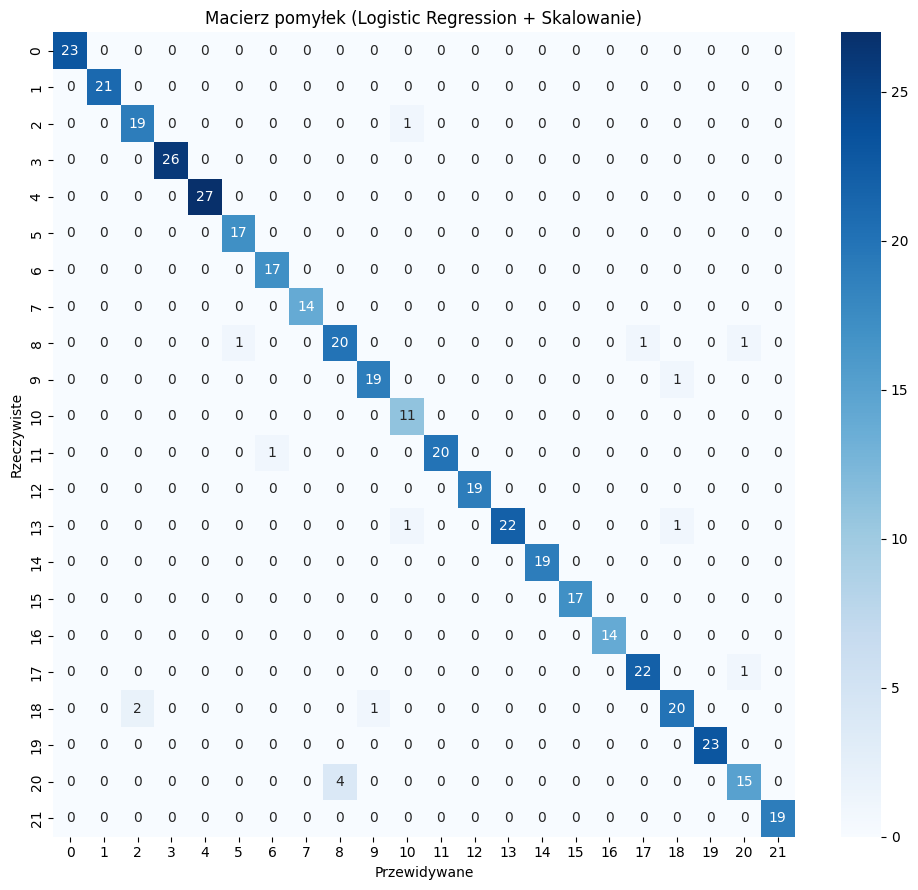

In [33]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("accuracy:", accuracy_score(y_test, y_pred))
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 9))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Przewidywane")
plt.ylabel("Rzeczywiste")
plt.title("Macierz pomyłek (Logistic Regression + Skalowanie)")
plt.tight_layout()
plt.show()

accuracy: 0.9863636363636363

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      

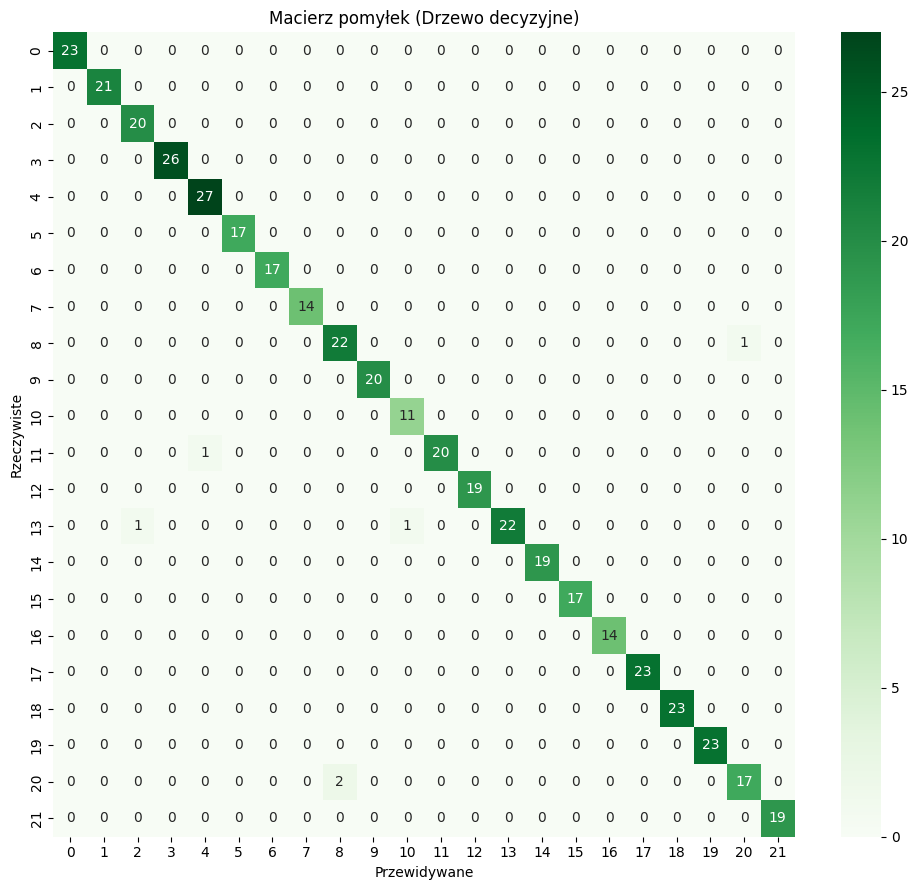

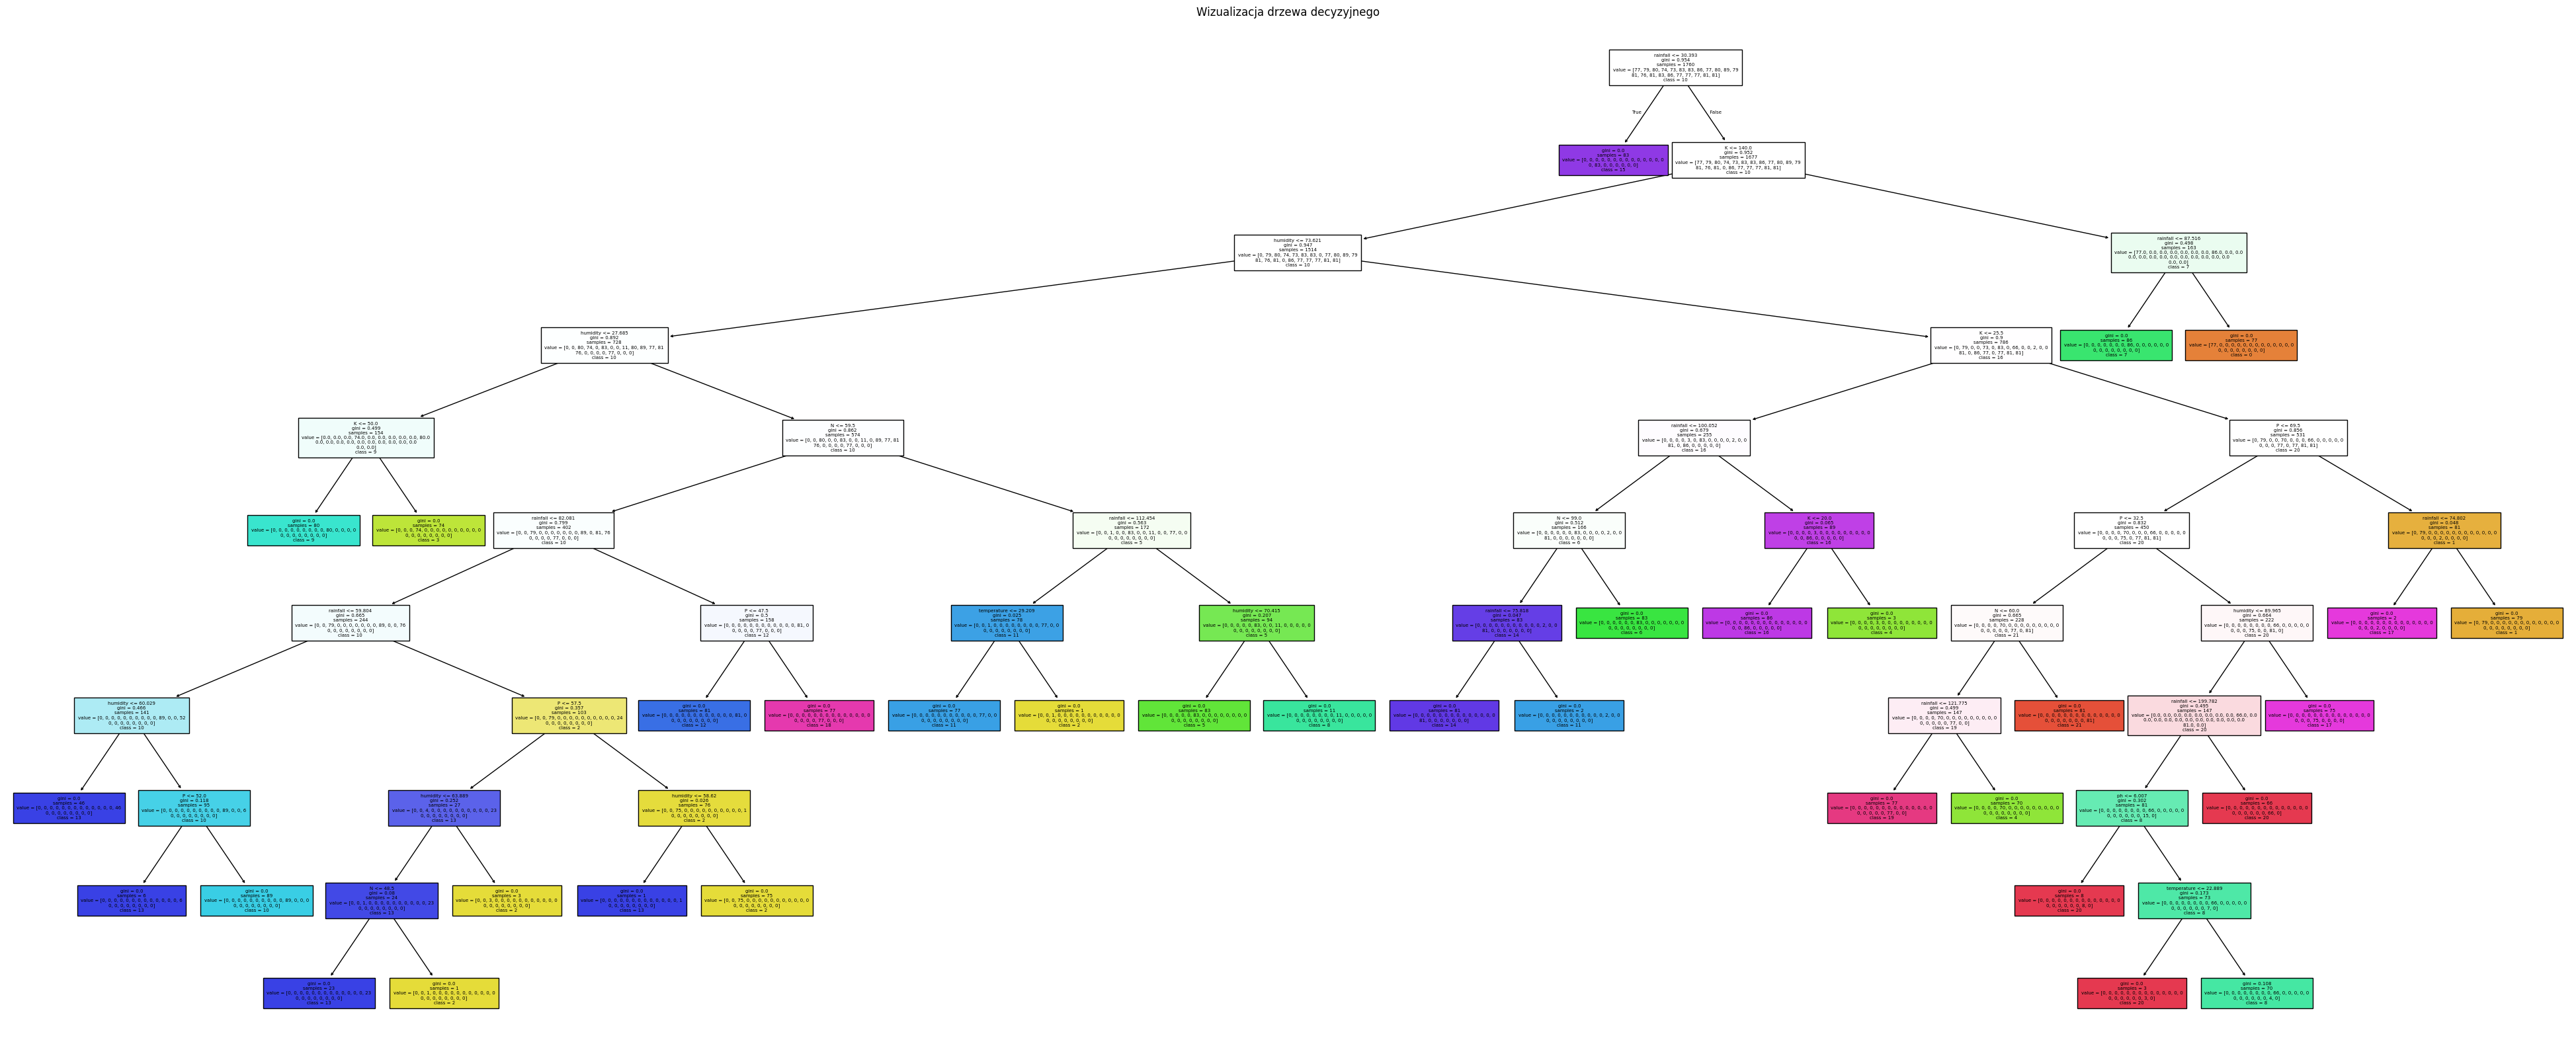

In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=42, max_depth=10)  
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("accuracy:", accuracy_score(y_test, y_pred))
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 9))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=tree.classes_, yticklabels=tree.classes_)
plt.xlabel("Przewidywane")
plt.ylabel("Rzeczywiste")
plt.title("Macierz pomyłek (Drzewo decyzyjne)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(50, 20))
plot_tree(tree, feature_names=X.columns, class_names=[str(c) for c in tree.classes_], filled=True, fontsize=5)
plt.title("Wizualizacja drzewa decyzyjnego")
plt.show()